# What are Word Embeddings?

*Word embeddings (WE's) are an excellent example of representational learning (RL) applied to Natural Language Processing (NLP).*

## *Representational Learning (RL)* is Unsupervised Learning - Why do it?

<img src="./graphics/0.1 Good Representations make Learning easier.png">

### Figure 1.

Let's start by first look at how some properties of word embeddings and then compare this to **one hot encodings** which was used before word embeddings came along.

In [ ]:
%pwd

# Word Similarity

The GloVe embeddings can be found here:  [https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/)

The set used in this notebook were downloaded from here:  [https://nlp.stanford.edu/data/glove.6B.zip](https://nlp.stanford.edu/data/glove.6B.zip)

In order to explore similarity between word embeddings, we need:
1. a function to read in the embeddings we will use
2. a function that returns the embeddings for a list of target words
3. a function that returns the word that has an embedding that is nearest to a given input word.

Start by reading in the embeddings.

## Exercise 1 - Write function to read in GloVe embeddings

<ul>
  <li>Call this function <code>get_glove</code></li>
  <li>Takes 3 parameters: <code>glove_dir</code>, <code>emb_dim</code> and <code>enc</code></li>
    <ul>
      <li><b>glove_dir</b> (str): directory containing the GloVe embeddings</li>
      <li><b>emb_dim</b> (int): dimensions of the embeddings to read in, valid values: 50, 100, 200, 300</li>
      <li><b>enc</b> (str): encoding used to read the embeddings file, default = "utf8"</li>
    </ul>
  </li>
  <li>Returns a dictionary with keys that are words in the embeddings vocabulary and values that are emb_dim-dimensional embedding vectors for those words</li>
</ul>

You can check your version with the one in the `word_embeddings.py` module

In [1]:
import word_embeddings as we
import os

BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, 'embeddings/glove.6B')
TEXT_DATA_DIR = os.path.join(BASE_DIR, '20_newsgroup')
# MAX_SEQUENCE_LENGTH = 1000
# MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100  # there are 4 sizes: 50, 100, 200 and 300

# read in the GloVe embeddings - be patient... This is a big file!
embeddings = we.get_glove(glove_dir = GLOVE_DIR, emb_dim = EMBEDDING_DIM)
# check out a few of the items that we have embeddings for, verify embedding type and shape
embedding_keys = list(embeddings.keys())
print(embedding_keys[0:5], type(embeddings['the']), embeddings['the'].shape)  # keys are words that have canned embeddings

Indexing word vectors.
Found 400000 word vectors.
['the', ',', '.', 'of', 'to'] <class 'numpy.ndarray'> (100,)


## Exercise 2 - Write function that returns the embeddings for a list of target words

<ul>
  <li>Call this function <code>get_vocab_embeddings</code></li>
  <li>Takes 2 parameters: <code>embedding_index</code> and <code>voc</code></li>
    <ul>
      <li><b>embedding_index</b> (dict): a dictionary with keys that are words in the embeddings vocabulary and values that are embedding vectors for those words</li>
      <li><b>voc</b> (list(str)): list of words that we want embeddings for</li>
    </ul>
  </li>
  <li>Returns 2-tuple where the first element is a dict of vocabulary word keys and embedding vector values. The second element is a list of the words that were not found in the embedding_index dict sorted in alphabetical order</li>
</ul>

You can check your version with the one in the `word_embeddings.py` module

## Exercise 3 - Write function that returns the word that has an embedding that is nearest to a given input word

<ul>
  <li>Call this function <code>word_NN</code></li>
  <li>Takes 2 parameters: <code>w</code> and <code>vocab_embeddings</code></li>
    <ul>
      <li><b>w</b> (str): string, word to compute nearest neighbor for - must be a key in vocab_embeddings</li>
      <li><b>vocab_embeddings</b> (dict): dictionary with keys that are words in the vocabulary and values that are d-dimensional numpy array of floats that are the real-vector embeddings for each word in the vocabulary</li>
    </ul>
  </li>
  <li>Returns a string that is the word in the vocabulary that is the closest to this particular word</li>
</ul>

### HINT

The numpy `linalg.norm` function computes the Euclidean distance between two vectors.

You can check your version with the one in the `word_embeddings.py` module. Let's see what kind of results we get with various words.

In [2]:
check_words = ['money', 'loved', 'angry', 'happy', 'desert', 'full']
for word in check_words:
    closest_word = we.word_NN(word, embeddings)
    print(f"original word = {word} | closest word = {closest_word}")


original word = money | closest word = cash
original word = loved | closest word = remembered
original word = angry | closest word = furious
original word = happy | closest word = feel
original word = desert | closest word = deserts
original word = full | closest word = complete


## Similar words are close together in embedding space

The little experiment we ran in the previous cell indicates that similar words have similar embeddings vectors. This is what we hoped we would see because it points to one simple aspect of the relationships between words.

## More complex relationships

### Gender relationships

Let's explore another aspect of embeddings by considering a **gender** relationship. If $V_{king}$ is the embeddings vector for king, $V_{queen}$ is the embeddings vector for queen, $V_{man}$ is the embeddings vector for man, and $V_{woman}$ is the embeddings vector for woman, we would expect:

$V_{king} - V_{queen} \approx V_{man} - V_{woman}$

which can be rewritten as:

1) $V_{king} - V_{man} + V_{woman} \approx V_{queen}$

Similarly, we can write a few more of these as follows:

2) $V_{uncle} - V_{man} + V_{woman} \approx V_{aunt}$
3) $V_{father} - V_{man} + V_{woman} \approx V_{mother}$
4) $V_{son} - V_{father} + V_{mother} \approx V_{daughter}$

To test these out, we need to a function similar to `word_NN`, but takes an embedding instead of target word. The `embedding_NN` function in the `word_embeddings.py` module returns the nearest word in the embeddings space given a target embedding (instead of word).

In [3]:
# verify equation 1
discards_eqn1 = ['king', 'man', 'woman']
# discards_eqn1.extend(['', '', '', ''])
# print(embeddings['queen'])  # there is an embedding for queen
print(discards_eqn1)
eqn1_emb = embeddings['king'] - embeddings['man'] + embeddings['woman']
print(eqn1_emb.shape, type(eqn1_emb))
print(we.embedding_NN(eqn1_emb, embeddings, discards_eqn1))  # queen, as we expected!

['king', 'man', 'woman']
(100,) <class 'numpy.ndarray'>
queen


In [4]:
# verify equation 4
discards_eqn4 = ['son', 'father', 'mother']
# discards_eqn4.extend(['', '', '', ''])
# print(embeddings['daughter'])  # there is an embedding for daughter
print(discards_eqn4)
eqn4_emb = embeddings['son'] - embeddings['father'] + embeddings['mother']
print(we.embedding_NN(eqn4_emb, embeddings, discards_eqn4))  # daughter, as expected

['son', 'father', 'mother']
daughter


## Relationships such as gender are captured in the embeddings vectors

The prior two cells provide good evidence that our embeddings capture **gender** relationships. Other relationships are captured within embeddings as well which indicates that they capture quite a lot of information. How do word embeddings compare to simpler representations of words such as one hot encoding? We'll look at that next

## Logistic Regression to classify reviews

Now that we've seen how word embeddings work, let build a couple of logistic regression models: one with GloVe word embeddings and another with one hot encoded vectors. We can then compare how these perform with ROC curves.

We'll build a model that classifies product reviews as either positive or negative.  We'll start by stating the mathematical formulation for logistic regression.  This model learns the conditional probability that a given data point $x$ is in one of two classes: $y = $ 1 or -1:

<img src="./graphics/0.3 logistic regression summary.png">

### Figure 2.

The nice thing about this formulation is that it can be used unaltered to predict either class if we designate the two classes by $y \in \{-1, 1\}$
<br>
<br>
<font style="font-size:18px">DQ1: Do you remember the typical approach to solving for these parameters?</font>

### Reading the data

In real-life, we'd probably spend a bunch of time wrangling data collected from one or more sources like websites or databases.  After that, you'll need to spend even more time annotating these reviews (1.).
<br>
<br>
<font style="font-size:18px">DQ2: What is _annotating_ and why do we need to do this?</font>

We'll side-step much of this work by looking at [labeled sentiment data from the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences). The file `sentiment_labelled_sentences.zip` contains the following four files:

+ amazon_cells_labelled.txt
+ imdb_labelled.txt
+ readme.txt
+ yelp_labelled.txt

The file `full_set.txt` used below was created by manually appending the `amazon`, `imdb`, and `yelp` files together.

This is what the first few rows look like:

|text |sentiment|
|:----|---------|
|So there is no way for me to plug it in here in the US unless I go by a converter.|0|
|Good case, Excellent value|1|
|Great for the jawbone.|1|
|Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!|0|
|The mic is great.|1|

The data set consists of 3000 sentences, each labeled '1' (if it came from a positive review) or '0' (if it came from a negative review). To be consistent with our formulation above, we will change the negative review label to '-1'.

In [5]:
%matplotlib inline
import string  # to get access to punctuation chars
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [7]:
## Read in the data set.
with open("sentiment_labelled_sentences/full_set.txt") as f:
    content = f.readlines()
    
## Remove leading and trailing white space
content = [x.strip() for x in content]

## Separate the sentences from the labels - tab separates sentences and labels
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]

## Transform the labels from '0 vs. 1' to '-1 vs. 1'
y = np.array(labels, dtype='int8')
y = 2*y - 1

In [8]:
print(len(content), y.shape)
print(f"{sentences[2]} | label: {labels[2]}") # positive +1 example
print(f"{sentences[3]} | label: {y[3]}") # positive -1 example

3000 (3000,)
Great for the jawbone. | label: 1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!! | label: -1


### Bag of words and One-Hot Encoding

Before word embeddings, the classic approach to encoding text was to use a _bag of words_ (**BOW**) representation. We described these in the slides, but let's go over some examples to illustrate how this approach works.

<img src="./graphics/0.5 bag of words.png" height="600" width="400" >

### Figure 3.

In this representation, each word is first mapped to a binary number with all zeros and a single 1.  For example, say we had a 7 word vocabulary $V$ consisting of the following text:

_Wes likes to walk in the park_

If each word vector were stacked horizontally we would form the following matrix:  <br><br>


\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 
\end{bmatrix}
where

Wes = [1, 0, 0, 0, 0, 0, 0]  
likes = [0, 1, 0, 0, 0, 0, 0]  
to = [0, 0, 1, 0, 0, 0, 0]  
walk = [0, 0, 0, 1, 0, 0, 0]  
in = [0, 0, 0, 0, 1, 0, 0]  
the = [0, 0, 0, 0, 0, 1, 0]  
park = [0, 0, 0, 0, 0, 0, 1]  

In **BOW**, Sentences, documents (collections of sentences) and collections of documents are reprsented by a V-dimensional vector $x$, where $x_i$ is the number of times that word $i$ occurs in the sentence.  So if we only had this sentence in a single document, it would be represented as:

\begin{bmatrix}
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\
1 
\end{bmatrix}

If we added these two sentences to our document:

_Wes likes to walk_

_Wes likes to park_

the vector representing this 3 sentence document would look like this:

\begin{bmatrix}
3 & = \text{'Wes' count} \\
3 & = \text{'likes' count} \\
3 & = \text{'to' count} \\
2 & = \text{'walk' count} \\
1 & = \text{'in' count} \\
1 & = \text{'the' count} \\
2 & = \text{'park' count} 
\end{bmatrix}


More realistically, a native speaker typically knows 15 - 20k words, but even though we probably don't need this many words to do a decent job classifying text, this vector still gets rather large.
<br>
<br>
<br>
<font style="font-size:18px">DQ3: Assuming the size of these vectors are not a problem, what might be some drawbacks to this type of representation?</font>

## Convert to BOW Inputs

### NOTE: This is an overly simplistic example of text processing. For a more realistic example, see my capstone project notebook:

https://github.com/MichaelSzczepaniak/llmamd/blob/main/preproc_disaster.ipynb

### Simple text processing steps

Before we can convert the data to numeric vectors, we have a little wrangling to do. This will consist of the following four transformations:

1. Remove punctuation and numbers.
2. Transform all words to lower-case.
3. Remove _stop words_.
4. Convert the sentences into vectors using the bag-of-words representation.

The next cell handles the first two steps.

In [9]:
## replace_with_space takes a string x and a list of characters removal_list 
## returns x with all the characters in removal_list replaced by ' '
def replace_with_space(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x

## Remove digits
digits = [str(x) for x in range(10)]
digit_less = [replace_with_space(x, digits) for x in sentences]

## Remove punctuation
punc_less = [replace_with_space(x, list(string.punctuation)) for x in digit_less]

## Make everything lower-case
sents_lower = [x.lower() for x in punc_less]

In [10]:
sents_lower[0:3]

['so there is no way for me to plug it in here in the us unless i go by a converter ',
 'good case  excellent value ',
 'great for the jawbone ']

### Simple Stop Words Removal

Stop words are words that are filtered out because they are believed to contain no useful information for the task at hand. These usually include articles such as 'a' and 'the', pronouns such as 'i' and 'they', and prepositions such as 'to' and 'from'. We have put together a very small list of stop words to keep things simple, but there are much larger lists which can easily be found on the web.

In [11]:
## Define our stop words
stop_set = set(['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from'])

## Split each line into word tokens
sents_split = [x.split() for x in sents_lower]
# remove stop words then rebuild the sentences
sents_processed = [" ".join(list(filter(lambda a: a not in stop_set, x))) for x in sents_split]

In [12]:
# check what we have so far
for i in [0, 1, 2]:
    print(f"{sents_processed[i]} | label = {labels[i]}")

so there is no way for me plug in here in us unless go by converter | label = 0
good case excellent value | label = 1
great for jawbone | label = 1


### Build vocaculary, convert words to vectors, convert word vectors to document vectors using the bag-of-words representation

We will build the vocabulary by capping the number of words (features, tokens) to the top 4500 most frequently occuring words. This means that a word will make it into our vocabulary only if it is one of the 4500 most common words in the corpus. This is often a useful step as it can weed out spelling mistakes and words which occur too infrequently to be useful.


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

selected_vocab_size = 4500

## Transform to BOW representation - start by instantiating a vectorizer object
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None,
                             preprocessor = None, stop_words = None, max_features = selected_vocab_size)
data_features = vectorizer.fit_transform(sents_processed)

## convert to 3d vector (matrix): each row is a review, each col corresponds a word count for each sample
## each row is a sum of the one hot encoded word vectors which can be used as the encoding for each document (review)
data_mat = data_features.toarray()

In [14]:
voc_dict = vectorizer.vocabulary_
vocab = list(voc_dict.keys())
vocab[0:10], data_mat.shape, data_mat[0:3, 0:3]  # 3000 reviews = docs, 4500 words = vocabulary

(['so', 'there', 'is', 'no', 'way', 'for', 'me', 'plug', 'in', 'here'],
 (3000, 4500),
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=int64))

In [ ]:
# look at a few word counts
voc_dict['so'], voc_dict['there'], voc_dict['is']

The shape of `data_mat` tells us that the data is layed out with each **row being a sample (review)** and each **column corresponds to a word in the vocabulary**. Each row is actually the sum of all the word vectors for each review which can be used an encoding of the entire document which we'll need to do classification.

### Training / Testing Split

Here we split the data into a training set of 2500 sentences and a test set of 500 sentences (of which 250 are positive and 250 negative).

In [15]:
## split the data into testing and training sets
np.random.seed(0)
# indices of 250 - and 250 + random samples, need the [0] on the np.where calls because
# it returns a 2-tuple and the results of the 1st logical condition are all we want
test_inds = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False),
                      np.random.choice((np.where(y==1))[0], 250, replace=False))
# build training set from indices not in the test set
train_inds = list(set(range(len(labels))) - set(test_inds))

train_data = data_mat[train_inds,]
train_labels = y[train_inds]

test_data = data_mat[test_inds,]
test_labels = y[test_inds]

print("train data: ", train_data.shape)
print("test data: ", test_data.shape)

train data:  (2500, 4500)
test data:  (500, 4500)


### Fitting a logistic regression model to the training data

Because solving for the parameters of the logistic regression model above is a **convex optimization**, we could implement our own logistic regression solver using stochastic gradient descent (SGD), but we'll use the solver already in `scikit-learn`.  Due to the randomness of the SGD procedure, different runs can yield slightly different solutions and thus different error values.

In [16]:
from sklearn.linear_model import SGDClassifier

## fit logistic classifier on training data: minimize neg log likelihood ("log"), no regularization penalty
clf = SGDClassifier(loss="log_loss", penalty=None)
clf.fit(train_data, train_labels)

## Pull out the parameters (w,b) of the logistic regression model
w = clf.coef_[0,:]
b = clf.intercept_

## Get predictions on training and test data
preds_train = clf.predict(train_data)
preds_test = clf.predict(test_data)

## Compute errors
errs_train = np.sum((preds_train > 0.0) != (train_labels > 0.0))
errs_test = np.sum((preds_test > 0.0) != (test_labels > 0.0))

print("Training error: ", float(errs_train)/len(train_labels))
print("Test error: ", float(errs_test)/len(test_labels))

Training error:  0.0016
Test error:  0.176


In [ ]:
test_data, test_data.shape, test_labels.shape  # reminder of what our test shapes

In [17]:
# compute probability of each test point
preds_test_probs = clf.predict_proba(test_data)[:,1]
preds_test_probs[0:10]

array([1.15781562e-14, 8.88282170e-12, 1.77877513e-05, 8.61037562e-01,
       9.42021761e-17, 3.46215324e-03, 9.64289866e-01, 2.10477596e-19,
       5.67492880e-21, 5.98313361e-14])

In [ ]:
preds_test[0:10]  # low probabilities map to -1, higher prob's to +1 which is a good check

### Create ROC Curves

ROC curves are an excellent tool to evaluate and compare binary classifiers.  The `get_roc_curves` function allows us to create a set of ROC curves based on the **labels** and the **probabilities** assigned to each row in the test set.

In [ ]:
test_labels.shape, test_labels.ndim, preds_test_probs.shape, test_labels.shape

Comparing 1 models


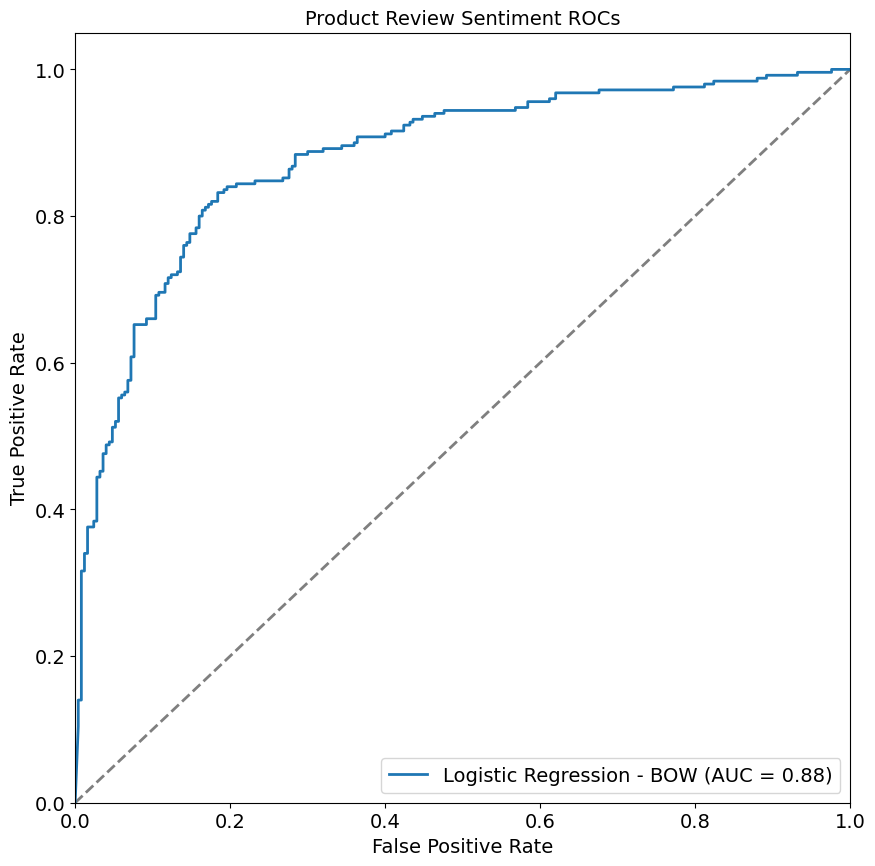

In [18]:
# create a single ROC curve for the One-Hot encoded logistic regression sentiment model
roc_1hot, auc_1hot = we.get_roc_curves(test_labels, preds_test_probs,
                                       model_names=['Logistic Regression - BOW'],
                                       plot_title='Product Review Sentiment ROCs')
roc_1hot.show()

### Figure 4.

My personal preference is to start with a simple and **interpretable** model to serve as a baseline for comparison before getting into the more sophisticated models. The model we just built will serve this purpose.

## Interpretation of BOW Coefficients

We used a **BOW** representation in order to vectorize each sentiment. For such a simple representation, this does a pretty decent job, but how do we interpret this model?

<font style="font-size:18px">DQ4: Think back to our earlier question about the pros and cons of the _one-hot encoded (1HE) inputs_.
<br>
<br>
a) In general, how many features will we have for models built like this?
<br>
<br>
b) What does each coefficient represent?</font>
<br>
<br>
Now that we have a BOW-based version, we'll work on building the same model but using word embeddings.  But before we do that, lets review some of the relevant concepts around representation and unsupervised learning techniques.

### Vocabulary Embeddings

As we saw above, our GloVe download contains embeddings for 400,000 tokens (words and punctuation).  Since we have defined our vocabulary to be much smaller than this, we'll use the `get_vocab_embeddings` function from **Exercise 2** above to create a dict of embeddings for just the items in our vocabulary so we aren't slinging around a bigger set of embeddings than we need to.

In [19]:
vocab_embeddings, missing_words = we.get_vocab_embeddings(embeddings, vocab)
words_found = len(vocab_embeddings)
words_missing = len(missing_words)
print("got embeddings for {} out of {} words in our vocabulary. Missing {}".format(words_found,
                                                                                   len(vocab),
                                                                                   words_missing))

got embeddings for 4374 out of 4500 words in our vocabulary. Missing 126


In [20]:
# which words are missing?
missing_words[0:5]  # names and funny mispellings

['aailiyah', 'absolutel', 'absolutley', 'accessable', 'accessoryone']

In [ ]:
# What does the embedding for 'the' look like?
vocab_embeddings['the'], len(vocab_embeddings['the'])  # 100 real numbers

### Using Word Embeddings For Classification

Word Embeddings are typically used with neural networks when doing classification.  They are not normally used in logistic regression models because they assume words are indpendent and have no relationships between each other.

Nonetheless, we'll give this a try and see how it works and then compare our results the bag-of-words (BOW) model we built earlier.  We'll need to first figure out how to represent documents using word embeddings.  References 6 and 7 below suggest that using a concatenated vector of coordinate-wise minimums and maximimums works well, so we'll give this a try with 300-dimensional embeddings instead of the 100-dimensional embeddings we were using earlier for illustration purposes.  The means that each document will be represented by a vector in $\mathbb{R}^{2d}$ or $\mathbb{R}^{600}$.  We'll draw some pictures so we can get a clear understanding of what's going on.

### Representing Document as Vectors

If we wrote each d-dimensional word embedding in a document of $n$ words as a column vector and stacked them horizontally, we would form the following $d \times n$ matrix:

<img src="./graphics/doc2vec01a.png">

#### Figure 5.  Document represented as a matrix of embedding vectors

The graphic above represents a document as a $d \times n$ matrix, but what we need is a representation of a document as a **vector**.  We'll do this by collapsing all $n$ columns in this matrix into a single column by first taking **coordinate minimums** which are the minimums of each row.  We'll then do the same, but take **coordinate maximums** and then stacking them on top of each other.  When do this, each document $i$ becomes of fixed length vector that looks like this:

<img src="./graphics/doc2vec02c.png">

#### Figure 6.  Feature vector representing a single document derived from matrix described in Figure 6.

Each of these $x_i$ vectors are samples, so we'll need to transpose this vector and stack them horizontally to form our data (feature) matrix which we'll send to our solver.

We'll start the process by reading the 300-dimensional embeddings, pare these back to our vocabulary and then build our feature matrix.  This is also referred to as a _design matrix_.

In [21]:
vocab_embs300 = we.get_glove(glove_dir = GLOVE_DIR, emb_dim = 300, enc = "utf8")
print("size of embeddings vocabulary: {}".format(len(vocab_embs300)))
vocab_embs300, missing_embs = we.get_vocab_embeddings(vocab_embs300, vocab)

Indexing word vectors.
Found 400000 word vectors.
size of embeddings vocabulary: 400000


In [22]:
print("We have {} words in our vocabulary".format(selected_vocab_size))
print("embeddings found for our vocabulary: {}".format(len(vocab_embs300)))
words_not_in_embeddings = selected_vocab_size - len(vocab_embs300)
print("vocabulary words not found in embeddings: {}".format(words_not_in_embeddings))
the_emb = vocab_embs300['the']
print("shape of embeddings read in: {}".format(the_emb.shape))

We have 4500 words in our vocabulary
embeddings found for our vocabulary: 4374
vocabulary words not found in embeddings: 126
shape of embeddings read in: (300,)


### Convert the documents to matrices of embeddings

The `doc2matrix` function used below converts a document to the matrix described in the Figure 5.

In [23]:
# iterate through each review, convert to Figure 6. matrices and store in a list
docs_as_matrices = []
for sent in sents_processed:
    sent_matrix = we.doc2matrix(sent, vocab_embs300, 300)
    docs_as_matrices.append(sent_matrix)

In [24]:
print("review strings/docs processed: {}".format(len(docs_as_matrices)))
print("first review text: {}".format(sents_processed[0]))
print("shape of the first review: {}".format(docs_as_matrices[0].shape))
print("top left corner of first review matrix: \n{}".format(docs_as_matrices[0][0:3, 0:3]))

review strings/docs processed: 3000
first review text: so there is no way for me plug in here in us unless go by converter
shape of the first review: (300, 16)
top left corner of first review matrix: 
[[-0.24561  -0.47618  -0.1749  ]
 [ 0.06801   0.069478  0.22956 ]
 [ 0.18254  -0.013086  0.24924 ]]


### Convert the document matrices to single vectors

The function below converts a document matrix described in the Figure 6. into a single coordinate min/max $\mathbb{R}^{600}$ vector described in Figure 7.

In [ ]:
docs_as_matrices[0].shape, docs_as_matrices[1].shape  # should be (embedding dim x number of words in doc)

In [25]:
x_feats = we.create_emb_feature_matrix(docs_as_matrices)
x_feats.shape  # should be (doc count x (2 x embedding dim))

(3000, 600)

## Build Model With New Features

We'll use the same data to train and test another model from WE inputs. Below we'll repeat the same train/test split as we did for the first model, but using the embeddings form of the inputs

In [26]:
train_data_embs = x_feats[train_inds,]
train_labels_embs = y[train_inds]

test_data_embs = x_feats[test_inds,]
test_labels_embs = y[test_inds]

print("train data: ", train_data_embs.shape)
print("test data: ", test_data_embs.shape)

train data:  (2500, 600)
test data:  (500, 600)


In [27]:
## fit logistic classifier on training data: minimize neg log likelihood ("log"), no regularization penalty
clf_embs = SGDClassifier(loss="log_loss", penalty=None)
clf_embs.fit(train_data_embs, train_labels_embs)

## Pull out the parameters (w,b) of the logistic regression model
w_embs = clf_embs.coef_[0,:]
b_embs = clf_embs.intercept_

## Get predictions on training and test data
preds_train_embs = clf_embs.predict(train_data_embs)
preds_test_embs = clf_embs.predict(test_data_embs)

## Compute errors
errs_train_embs = np.sum((preds_train_embs > 0.0) != (train_labels_embs > 0.0))
errs_test_embs = np.sum((preds_test_embs > 0.0) != (test_labels_embs > 0.0))

print("Training error: ", float(errs_train_embs)/len(train_labels_embs))
print("Test error: ", float(errs_test_embs)/len(test_labels_embs))

Training error:  0.1156
Test error:  0.228


In [28]:
preds_test_probs_glove = clf_embs.predict_proba(test_data_embs)[:,1]

In [29]:
preds_test_probs_bow_v_glove = np.hstack((preds_test_probs.reshape(-1,1),
                                          preds_test_probs_glove.reshape(-1,1)))
preds_test_probs.shape, preds_test_probs_glove.shape, preds_test_probs_bow_v_glove.shape

((500,), (500,), (500, 2))

DEBUG get_roc_curves: BEFORE expanding y_tests from 1 to 2 columns
DEBUG get_roc_curves: BEFORE expansion, y_tests shape = (500, 1)
DEBUG get_roc_curves: BEFORE expansion, y_expanded shape = (500, 1)
DEBUG get_roc_curves: DURING expansion, i = 0 
DEBUG get_roc_curves: DURING expansion, y_expanded shape = (500, 2) 
DEBUG get_roc_curves: AFTER expansion, y_tests columns = 2 
Comparing 2 models


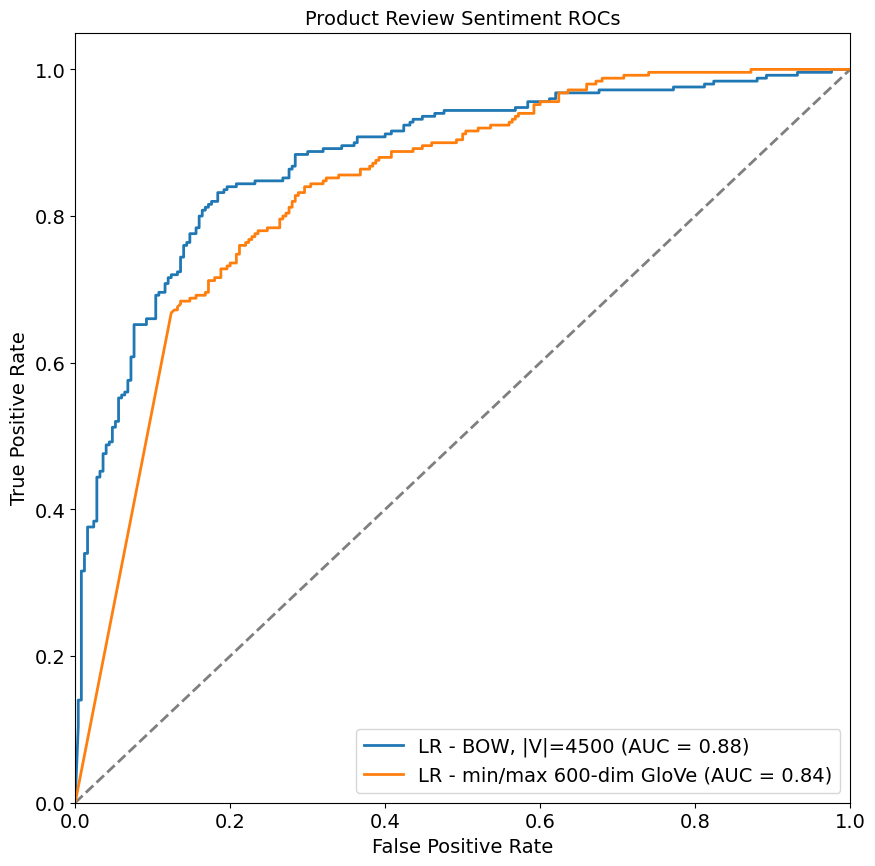

In [30]:
preds_test_probs_bow_v_glove

# create a two ROC curves comparing BOW and WE encoded logistic regression sentiment models
roc_bow_v_glove, auc_1hot = we.get_roc_curves(test_labels, preds_test_probs_bow_v_glove,
                                              model_names=['LR - BOW, |V|=4500',
                                                           'LR - min/max 600-dim GloVe'],
                                              plot_title='Product Review Sentiment ROCs')
roc_bow_v_glove.show()

#### Figure 7.  Logistic Regression using BOW $\mathbb{R}^{4500}$ (blue) vs. GloVe min/max $\mathbb{R}^{600}$ (orange)

<font style="font-size:18px">DQ5: What might Figure 7. be telling us?  Specifically:
<br>
<br>
a) Which of these two representations contains more information *per dimension*?  Why?
<br>
<br>
b) How do you think these representations might compare if they were inputs to a CNN instead of a logistic regression model?</font>
<br>
<br>

### Using Word Embeddings as they were intended

The fact that we didn't see any improvement using word embeddings in the way we chose (document min/max) with logistic regression shouldn't have been too surprising because of the way logistic regression works: learning a linear decision boundary

We could probably do better if we continued to experiment with different ways to represent document with the embeddings, but why might we be optimistic about this if logistic regression just learns a linear decision boundary in high-dimensional space?


## Implementing Word Embeddings

There are generally two approaches to implementing word embeddings in an analysis.  One can:

1. use pre-trained (aka "canned") embeddings or
2. create customer embeddings

### Pros and Cons of Pre-Trained Embeddings


### Pros and Cons of Custom Embeddings



## Pre-Trained Embeddings

The two alogritms I'm aware of for creating pre-trained word embeddings are:

1. Word2Vec
2. GloVe - Global Vectors for Word Representation

### Word2Vec

Two different learning models were introduced that can be used as part of the word2vec approach to learn the word embedding; they are:

+ Continuous Bag-of-Words, or CBOW model.
+ Continuous Skip-Gram Model.

The CBOW model learns the embedding by predicting the current word based on its context. The continuous skip-gram model learns by predicting the surrounding words given a current word.

The continuous skip-gram model learns by predicting the surrounding words given a current word.

<img src="./graphics/Word2Vec-Training-Models.png">

#### Figure 9. Word2Vec Training Models Taken from “Efficient Estimation of Word Representations in Vector Space”, 2013 (ref. 15.)

Both models are focused on learning about words given their local usage context, where the context is defined by a window of neighboring words. This window is a configurable parameter of the model.

#### Meta-parameters

To build embeddings using the **Word2Vec** algorithm, the following meta-parameters need to be set:

+ CBOW vs. Skip-Gram - described above
+ Sliding Window Size - In the above diagam, window size = 2.

### GloVe



### A simple approach to word embeddings

*You shall know a word by the company it keeps. (J.R. Firth, 1957)*

+ Much of the meaning of a word w is captured by the words it co-occurs with:
<p><center>$w_{t-3} \quad w_{t-2} \quad w_{t-1} \quad w_t \quad w_{t+1} \quad w_{t+2} \quad w_{t+3}$</center>
    
<img src="./graphics/simple_we_approach.png">

1. **Get a list of words and their frequencies** - We'll recompute these using the **Brown** corpus.   
2. **Decide on the vocabulary** - There are two potentially distinct vocabularies: the words for which we will obtain embeddings (`vocab_words`) and the words we will consider when looking at context information (`context_words`). We will take the former to be all words that occur at least 20 times, and the latter to be all words that occur at least 100 times. These choices are pretty arbitrary: by all means, play around with them and find something better.

## 1. Accessing the Brown corpus

The *Brown corpus* is available as part of the Python Natural Language Toolkit (`nltk`).

In [ ]:
import numpy as np
import pickle
import nltk
nltk.download('brown')
nltk.download('stopwords')
from nltk.corpus import brown, stopwords
from scipy.cluster.vq import kmeans2
from sklearn.decomposition import PCA

The corpus consists of 500 samples of text drawn from a wide range of sources. When these are concatenated, they form a very long stream of over a million words, which is available as `brown.words()`. Let's look at the first 20 words.

In [ ]:
for i in range(20):
    print (brown.words()[i],)

As we did before, let's remove stopwords and punctuation and make everything lowercase.  In this case, we'll use the NLTK stop words instead of our small manual list like we did originally.

The resulting sequence will be stored in `my_word_stream`.

In [ ]:
my_stopwords = set(stopwords.words('english'))
# make lower case and remove stopwords in one line
word_stream = [str(w).lower() for w in brown.words() if w.lower() not in my_stopwords]
# remove all single char words and punctuation
my_word_stream = [w for w in word_stream if (len(w) > 1 and w.isalnum())]

## Computing co-occurrence probabilities

<font color="magenta">Get a list of words and their frequencies.</font>

### WARNING:  This is an expensive operation which took over a minute and half to run the first time!!!

In [ ]:
N = len(my_word_stream)
words = []
totals = {}
for i in range(1, N-1):
    w = my_word_stream[i]
    if w not in words:
        words.append(w)
        totals[w] = 0
    totals[w] = totals[w] + 1

### Two Vocabularies

In [ ]:
embedding_frequency_threshold = 19
context_frequency_threshold = 99

vocab_words = [w for w in words if totals[w] > embedding_frequency_threshold]
context_words = [w for w in words if totals[w] > context_frequency_threshold]

### How large are these two word lists? 

In [ ]:
len(vocab_words), len(context_words)  # should be (4720, 918), check

3. Get co-occurrence counts. These are defined as follows, for a small constant `window_size=2`.

* Let `w0` be any word in `vocab_words` and `w` any word in `context_words`.
* Each time vocabulary word `w0` occurs in the corpus, look at the window of `window_size` words before and after it. If `w` appears in this window, we say it appears in the context of (this particular occurrence of) `w0`.
* Define `counts[w0][w]` as the total number of times `w` occurs in the context of `w0`.

The function `get_counts` computes the `counts` array, and returns it as a dictionary (with values that are also dictionaries).

In [ ]:
def get_counts(my_word_stream=my_word_stream, window_size=2):
    """Creates a co-occurence counts of context word counts for each vocabulary word
    
    PRECONDITION: assumes that following lists are already in the environment:
    vocab_words - see above
    context_words - see above
    
    Args:
        my_word_stream (list): list of strings that is the overall vocabulary,
            stopwords and single char's removed, all lower cased
        window_size (int): the number of words to the left and right of a given 
            word to be considered 'in the context of' that word
    
    Returns:
        dict: Keys are vocabulary words. Value are dictionary with keys that are
        context words and values that are counts of those words in the context of
        the vocabulary word
    
    """
    
    N = len(my_word_stream)
    counts = {}  # holds number of times context word is found to occur (value)
                 # with a vocabulary word (key)
    # init vocaulary words as keys - values will be another dict
    # inner dict with have keys that are context words and
    #                      values that are counts that the context word occurs with vocabulary word
    for w0 in vocab_words:
        counts[w0] = {}
    # 
    for i in range(window_size, N - window_size):
        w0 = my_word_stream[i]
        # if the stream word is not in the vocabulary, skip it
        if w0 in vocab_words:
                      # indices to define context window j-2, j-1, j+1, j+2
            for j in (list(range(-window_size,0)) + list(range(1,window_size+1))):
                w = my_word_stream[i+j]
                if w in context_words:
                    if w not in counts[w0].keys():
                        counts[w0][w] = 1
                    else:
                        counts[w0][w] = counts[w0][w] + 1
    return counts

Define `probs[w0][]` to be the distribution over the context of `w0`, that is:
* `probs[w0][w] = counts[w0][w] / (sum of all counts[w0][])`
  + count of co-occurances divided by sum of all co-occurances

This is computed by the function `get_co_occurrence_dictionary`, given `counts`.

In [ ]:
def get_co_occurrence_dictionary(counts):
    """Create the the co-occurance probabilities
    
    Args:
        counts (dict): Keys are vocabulary words. Value are dictionary with keys
            that are context words and values that are counts of those words in 
            the context of the vocabulary word
        
    Returns:
        dict: dictionary with keys that are vocabulary words and values are
              dictionaries with keys that are context words and values are
              co-occurance probabilities
    
    """
    probs = {}
    for w0 in counts.keys():
        sum_all_cooccurs = 0
        for w in counts[w0].keys():
            sum_all_cooccurs = sum_all_cooccurs + counts[w0][w]
        if sum_all_cooccurs > 0:
            # init inner dict of context word prob's for this vocabulary word
            probs[w0] = {}
            # iterate through all the context words found for this vocabulary word
            for w in counts[w0].keys():
                probs[w0][w] = float(counts[w0][w]) / float(sum_all_cooccurs)
    return probs

The final piece of information we need is the frequency of different context words. The function below, `get_context_word_distribution`, takes `counts` as input and returns (again, in dictionary form) the array:

* `context_frequency[w]` = sum of all `counts[][w]` / sum of all `counts[][]` 

In [ ]:
def get_context_word_distribution(counts):
    """Computes the frequency of different context words
    
    Args:
        counts (dict): Keys are vocabulary words. Value are dictionary with keys
            that are context words and values that are counts of those words in 
            the context of the vocabulary word
    
    Returns:
        dict: 
    
    """
    counts_context = {}
    sum_context = 0
    context_frequency = {}
    for w in context_words:
        counts_context[w] = 0
    for w0 in counts.keys():
        for w in counts[w0].keys():
            counts_context[w] = counts_context[w] + counts[w0][w]
            sum_context = sum_context + counts[w0][w]
    for w in context_words:
        context_frequency[w] = float(counts_context[w])/float(sum_context)
    return context_frequency

Based on the various pieces of information above, we compute the **pointwise mutual information matrix (PMI)**:
* `PMI[i,j] = MAX(0, log probs[ith vocab word][jth context word] - log context_frequency[jth context word])`

<img src="./graphics/pmi.png">

The embedding of any word can then be taken as the corresponding row of this matrix. However, to reduce the dimension, we will apply PCA.

### WARNING:  This is also an expensive operation!!!

In [ ]:
print ("Computing counts and distributions")
counts = get_counts(my_word_stream=my_word_stream, window_size=2)
probs = get_co_occurrence_dictionary(counts)
context_frequency = get_context_word_distribution(counts)
#
print ("Computing pointwise mutual information")
n_vocab = len(vocab_words)
n_context = len(context_words)
pmi = np.zeros((n_vocab, n_context))
for i in range(0, n_vocab):
    w0 = vocab_words[i]
    if w0 in probs.keys():
        for w in probs[w0].keys():
            j = context_words.index(w)
            pmi[i,j] = max(0.0, np.log(probs[w0][w]) - np.log(context_frequency[w]))
    else:
        continue

Now reduce the dimension of the PMI vectors using principal component analysis. Here we bring it down to 100 dimensions, and then normalize the vectors to unit length.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
vecs = pca.fit_transform(pmi)
for i in range(0,n_vocab):
    vecs[i] = vecs[i]/np.linalg.norm(vecs[i])

In [ ]:
import pickle

# save this embedding so that it doesn't need to be computed every time.
fd = open("embedding.pickle", "wb")
pickle.dump(vocab_words, fd)
pickle.dump(context_words, fd)
pickle.dump(vecs, fd)
fd.close()

In [ ]:
len(vecs[0]), n_vocab

In [ ]:
def word_NN_by_index(w, vocab_words, vecs):
    if not(w in vocab_words):
        print ("Unknown word")
        return
    v = vecs[vocab_words.index(w)]
    neighbor = 0
    curr_dist = np.linalg.norm(v - vecs[0])
    for i in range(1, n_vocab):
        dist = np.linalg.norm(v - vecs[i])
        if (dist < curr_dist) and (dist > 0.0):
            neighbor = i
            curr_dist = dist
    return vocab_words[neighbor]

In [ ]:
word_NN_by_index('money', vocab_words, vecs)

In [ ]:
word_NN_by_index('bought', vocab_words, vecs)

In [ ]:
word_NN_by_index('loved', vocab_words, vecs)

In [ ]:
word_NN_by_index('above', vocab_words, vecs)  # might be an NLTK stop word

### Test Brown-based embeddings on other words

These test cases looked reasonable.

In [ ]:
word_NN_by_index('pulmonary', vocab_words, vecs)

In [ ]:
word_NN_by_index('world', vocab_words, vecs)

### TODO - These didn't give the same results as earlier testing - Need to debug

In [ ]:
word_NN_by_index('london', vocab_words, vecs)

In [ ]:
word_NN_by_index('communism', vocab_words, vecs)

## Two Main Goals of RL: Vector Quantization & Finding Meaningful Structure in Data

Word embeddings focus primarily on the former (vector quantization) with the later (meaningful structure) in mind.

### Common Clustering Methods

+ k-Mean (covered awhile ago,so we'll do a quick review)
+ PCA (also covered awhile ago, so we'll do a quick review this also)



+ includes (but is not limited to) **dimensionality reduction** 
  + bring out true degree of freedom
+ involves encoding and decoding steps
+ results range from **sparse** to **dense encodings**
+ typical examples: PCA, k-Means, NN-auto-encoders

## Unsupervised Learning

## k-Means Review

+ Simpliest unsupervised learning algorithm
+ Results differ depending on initial choice of centers (means)
+ Multiple methods for center intialization
  + randomly chose all centers from uniform distribution
  + randomly chose extra centers, the prune later
  + k-means++
    + chose first center from uniform distribution
    + let $C = {x}$ centers chosen so far
    + pick successive centers from distribution $Pr(x) \propto dist{(x, C)}^2$
      + probability of chosing next center increases as you move away from existing centers
+ Results in a **sparse** encoding (more on this later) - just the labels
+ The good:
  + Fast and easy
  + Effective in quantization
+ The bad:
  + Spherical clusters of the same radius

Basic algorithm:

1. Choose k
2. Initialize k-centers: $\mu_1,..., \mu_k$  
  + There are several ways to do this. Simpliest is chosing them randomly.
3. Assign each point to its closest center
4. Update each $\mu_j$ to the mean of the points assigned to it.
5. Repeat 3. and 4. until the $\mu_j$ values don't move anymore


<font color="blue" style="font-size:18px">Graphically, the first 2 iterations of the algorithm looks like this on a small dataset with k = 3</font>:
<img src="./graphics/04 kmeans_4steps.png" width="600" height="400">

**<font color="red" style="font-size:18px">Why reduce the number of features in a data set?</font>**

1. reduces storage and computation time
2. high-dimensional data often has a lot redundancy
3. removing noisy and/or irrelevant features improves model accuracy



**<font color="green" style="font-size:16px">Example: are all the pixels in an image informative?</font>**

<img src="./graphics/01 informative pixels.jpg">

### PCA Review - Eliminating low variance coordinates

It took me a couple of revists before getting truly comfortable with **Principal Component Analysis** (PCA), but it was worth the effort because it's one of the most important tools to have in your Data Science toolbox.

PCA is based on chosing the highest variance directions in which to project your data onto.  This is accomplished by computing the eigenvalue and accompanying eigenvectors

projection directions based on the **covariance matrix** of the data. This matrix allows us to contrast the effect of picking **coordinate** directions (i.e. pixels) versus **eigenvector** directions. In particular:

* *The ith **diagonal entry** of the covariance is the variance in the ith coordinate (the ith pixel).*
* *The ith **eigenvalue** of the covariance matrix is the variance in the direction of the ith eigenvector.*

### Why project data onto another direction?  A one dimensional example

<img src="./graphics/02 a 1d example.jpg">

If two variables are correlated, doesn't knowing one inform you of the other?  If so, most of the information is contained along the **projection** in the direction of maximimum variation.

### How do we find this "best" direction to project onto?

<img src="./graphics/03 first eigenvector of covar.jpg">

<font style="font-size:18px">By </font> <font color="green" style="font-size:18px"> "best" </font><font style="font-size:18px">we mean the direction of maximum variance</font>

<font style="font-size:18px">DQx. Why would we want to compute eigenvectors from covariance matrix?</font>

<font style="font-size:18px">DQy. What do we mean by the "first eigenvector of the covariance matrix"?</font>

<font style="font-size:18px">DQz. What would the second eigenvector of the covariance matrix look like for the data shown above?</font>

### Discussion Answers

**DQ1.** Start by writing the formulation of the likelihood:  $\Pi^n_{i=1} Pr_{w,b}(y_i | x_i)$  which is what we want to **maximize**.  We typically turn it into a **minimization** problem by taking the natural log and then the negative of that.  We then search for the minimum of the **negative log-likelihood** using gradient descent to find a solution.  Because this problem is **convex**, we are gauranteed to find a solution.

**DQ2.**  In a real-world scenario, you would collect these reviews from an available source, but often times these reviews are not labeled "positive" or "negative".  When this is the case, you have to read through the reviews yours and assign labels.

E-Bay get around this by having the user click a radio button that identifies the review.  This is a good idea as it can save a lot time down the road.

**DQ3.** 1) No word context or language structure is accounted for. E.g. "The dog bit Johnny." and "Johnny bit the dog." use the same 4 words, but have very different meanings (especially if you're Johnny or the dog).
<br><font style="color:white">**DQ2.** </font>2) Sparse representations are generally require a lot of memory and computation to process (see reference 1. below)

**DQ4.** a) We'll have a coefficient for each word in our defined vocabulary plus 1 for the bias term or $|V| + 1$.<br><br>b) Each coefficient represents the relative importance of that words contribution to the probability that the document has a positive sentiment.<br><br>More specifically, a negative coefficient implies that the more prevelant this word is in a document, the **lower** the probability that the sentiment will be positive. Similarly, a positive coefficient implies that the more prevelant this word is in a document, the **higher** the probability that the sentiment will be positive.

**DQ5.** a) Because the AUC of both of these representations are very similar, this implies each representation contains a similar amount total of information in the context of logistic regression. Since the WE representation is much smaller than the BOW representation (600 vs 4500 dimensions), the WE representation contains more information *per dimension in the context of logistic regression*.
<br><br>b) The WE representation would probably do better than the BOW because more information is contained in this representation and a CNN can more flexibly utilize this information during training

**DQx.** For covariance matrix $\Sigma$ of d-dimensional data $X$, the variance of $X$ in the direction of $u$ is given by $u^T \Sigma u$.  $u^T \Sigma u$ is maximized by setting $u$ to the first **eigenvector** of $\Sigma$.  The maximum value of this variance is the corresponding **eigenvalue**.

**DQy.** For d-dimensional $X$, the **eigenvalues** of the covariance matrix are the variances of the data projected in the direction of the corresponding **eigenvector**.  So to find first **principal component (PC)**, we compute all $d$ sets of eigenvectors and eigenvalues ($\Sigma u_i = \lambda_i u_i$ for i = 1 to d) and then find the eigenvector ($u_i$) corresponding the largest eigenvalue ($\lambda_i$)

**DQz**. This would be the line perpendicular to the first **PC** because eigenvectors computed from the covariance matrix form an **orthonormal basis**.

### References

1. I had to spend many hours doing annotations for a recent project.  It's interesing for the first hour or two as you learn about a new domain, but can get rather mind-numbing after that.
2. [A Gentle Introduction to Sparse Matrices for Machine Learning](https://machinelearningmastery.com/sparse-matrices-for-machine-learning/)
3. [tf-idf on Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
4. ROC reference - TODO
5. [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/)
  +  Jeffrey Pennington, Richard Socher, Christopher D. Manning
  + Pre-trained word vectors where obtained [here](http://nlp.stanford.edu/data/glove.6B.zip)
6. [Apply word embeddings to entire document, to get a feature vector](https://stats.stackexchange.com/questions/221715/apply-word-embeddings-to-entire-document-to-get-a-feature-vector/)
7. [Representation learning for very short texts using weighted word embedding aggregation](https://arxiv.org/pdf/1607.00570.pdf)
8. [Keras Project - Pre-trained word embeddings example](https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py)
9. [NLTK stop words](https://pythonspot.com/nltk-stop-words/)
10. [Stop Words in spaCy](https://realpython.com/natural-language-processing-spacy-python/#stop-words)
11. [spaCy english language model - GloVe-based](https://spacy.io/models/en#en_core_web_lg)
12. [What Are Word Embeddings for Text?](https://machinelearningmastery.com/what-are-word-embeddings/)
13. [Gender Stereotype Reinforcement](https://arxiv.org/pdf/2009.01334v1.pdf)
14. [Neural Network Methods in Natural Language Processing - Goldberg](https://www.amazon.com/Language-Processing-Synthesis-Lectures-Technologies/dp/1627052984/ref=as_li_ss_tl?ie=UTF8&qid=1502062931&sr=8-1&keywords=Neural+Network+Methods+in+Natural+Language+Processing&linkCode=sl1&tag=inspiredalgor-20&linkId=d63df073fea3ebe2d405820570b3ff03)
15. [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf)